Exploring Sigma
===============

In [1]:
import scFates as scf
import scanpy as sc
sc.set_figure_params()
import warnings

We are loading a dataset containing a simple bifurcation, already procesed with PCA, UMAP and diffusion maps

In [2]:
adata=scf.datasets.test_adata()

### Example of a bad sigma
Here we use an overly high sigma parameter to demonstrate its danger:

inferring a principal tree --> parameters used 
    50 principal points, sigma = 100, lambda = 1, metric = euclidean
    fitting:   4%|▍         | 2/50 [00:01<00:37,  1.27it/s]
    converged
    finished (0:00:01) 

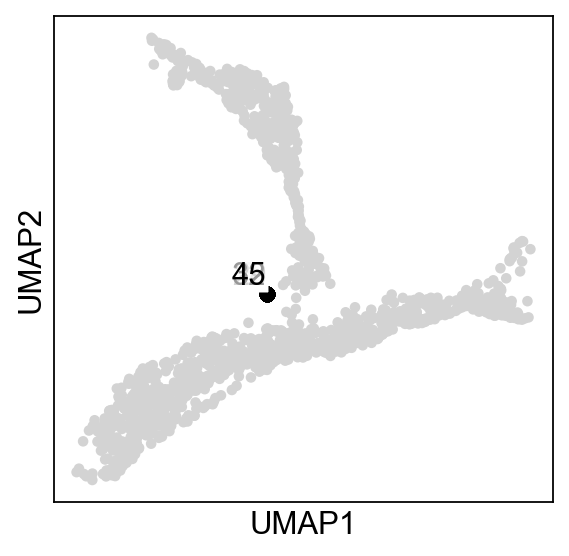

--> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


In [3]:
scf.tl.tree(adata,
            Nodes=50,
            use_rep="X_pca",
            method="ppt",
            ppt_nsteps=50,
            ppt_sigma=100,
            ppt_lambda=1,
            seed=42,plot=True)

As you can see, all the nodes collapsed in the middle of the data, this is due to the fact that each node is assigned to all cells, which is not what we want. Instead, we are aiming for locallity, were each node is assigned to a subset of cells close to it:

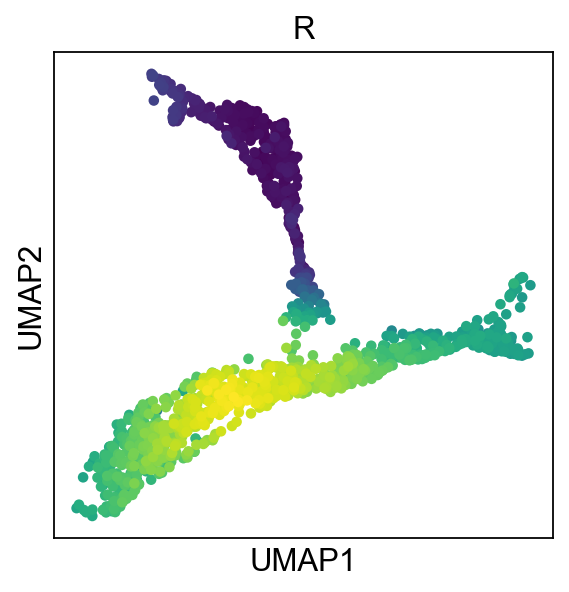

In [4]:
adata.obs["R"]=adata.obsm["X_R"][:,0]
sc.pl.umap(adata,color="R",colorbar_loc=None)

### Exploring sigma in PC space

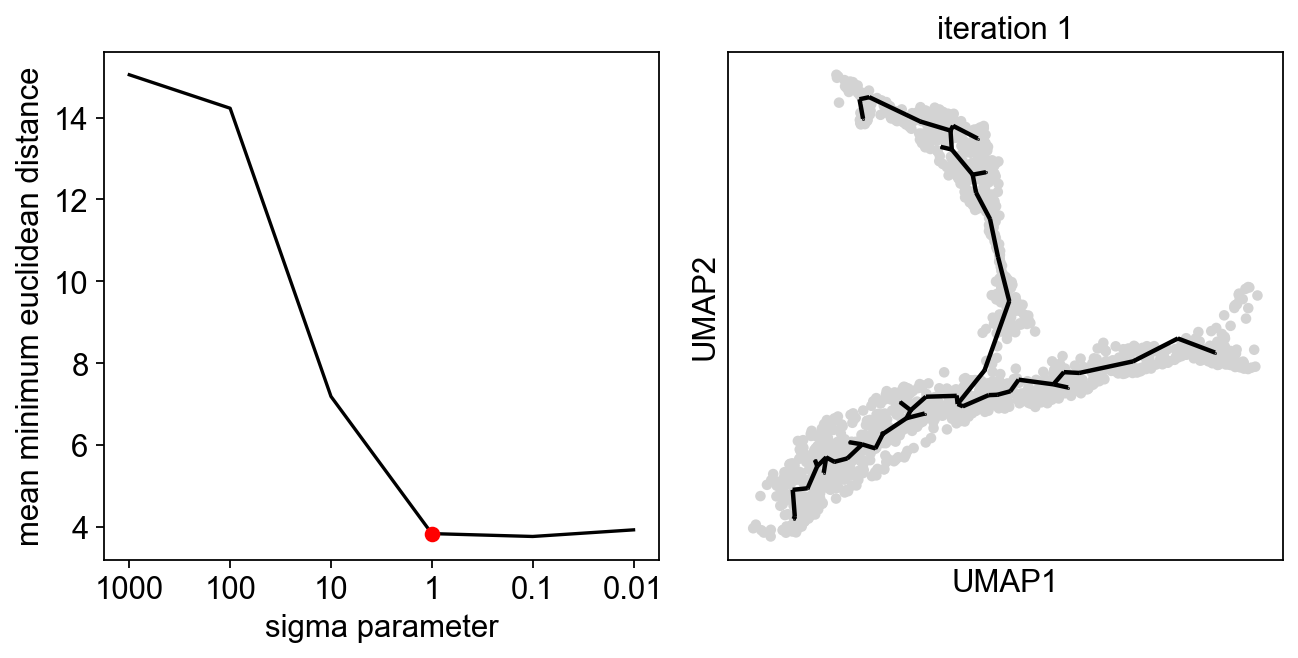

In [5]:
sig=scf.tl.explore_sigma(adata,
                         Nodes=50,
                         use_rep="X_pca",
                         sigmas=[1000,100,10,1,0.1,0.01],
                         seed=42,plot=True)

In PC space, a sigma of 1 is suggested, if we look at assigned we obtain a much better locality:

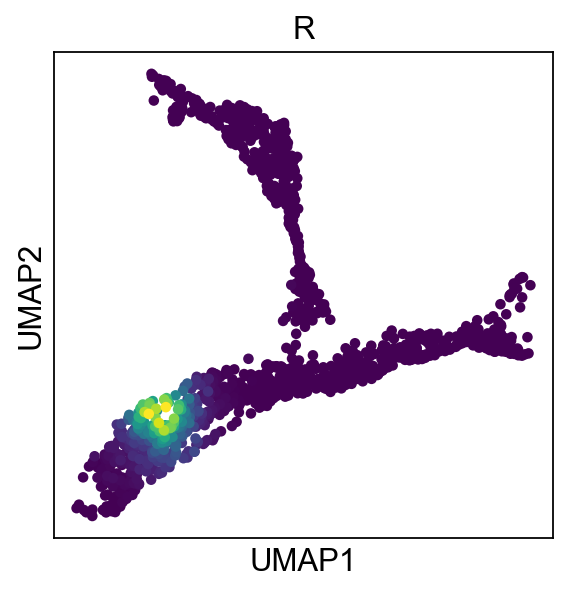

In [6]:
adata.obs["R"]=adata.obsm["X_R"][:,0]
sc.pl.umap(adata,color="R",colorbar_loc=None)

inferring a principal tree --> parameters used 
    50 principal points, sigma = 1, lambda = 100, metric = euclidean
    fitting:  50%|█████     | 25/50 [00:01<00:01, 16.18it/s]
    converged
    finished (0:00:01) 

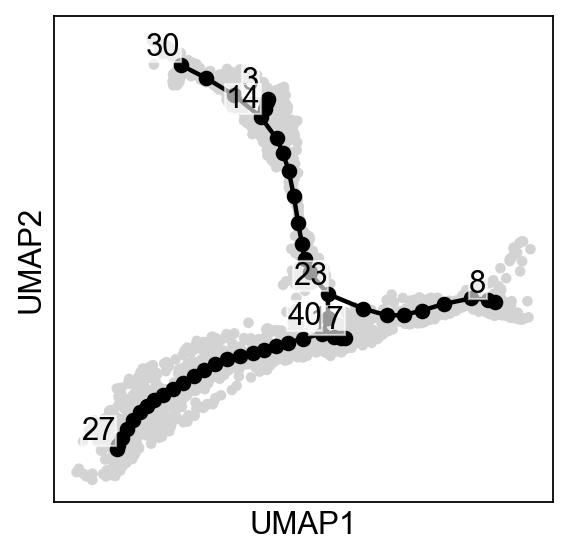

--> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


In [7]:
scf.tl.tree(adata,
            Nodes=50,
            use_rep="X_pca",
            method="ppt",
            ppt_nsteps=50,
            ppt_sigma=sig,
            ppt_lambda=100,
            seed=42,plot=True)

### Exploring sigma in UMAP space

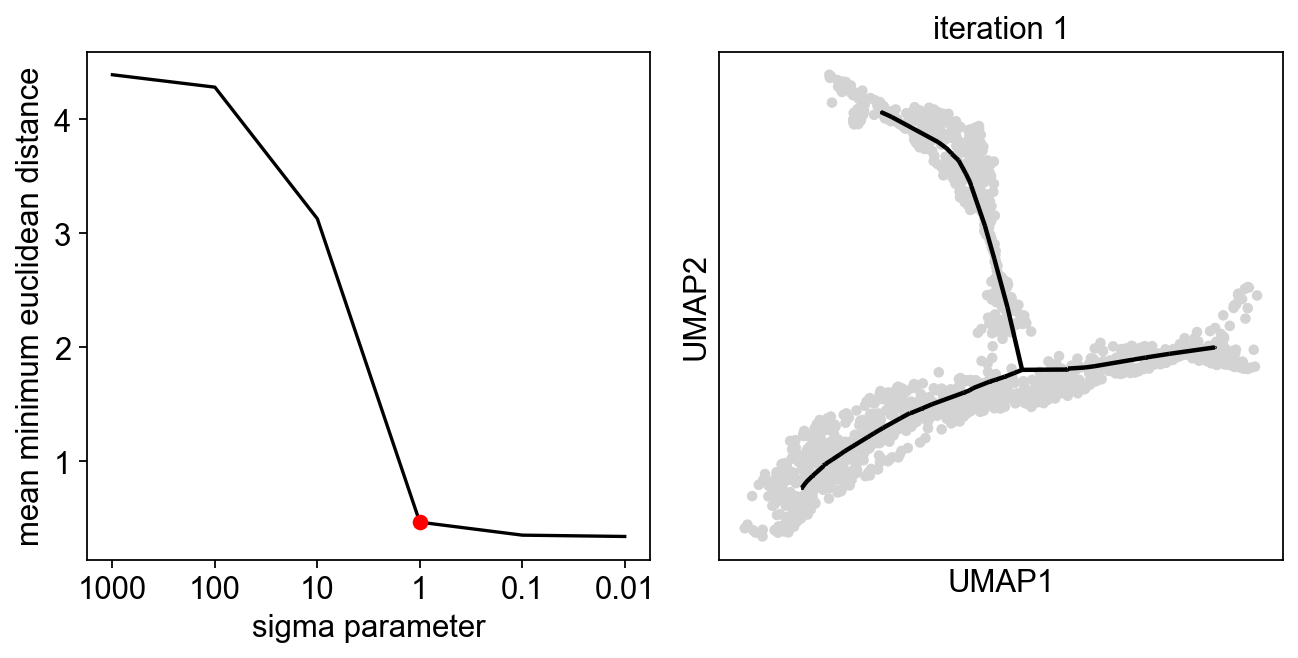

In [8]:
sig=scf.tl.explore_sigma(adata,Nodes=50,use_rep="X_umap",seed=42,plot=True)

inferring a principal tree --> parameters used 
    50 principal points, sigma = 1, lambda = 100, metric = euclidean
    fitting:  38%|███▊      | 19/50 [00:00<00:00, 73.28it/s]
    converged
    finished (0:00:00) 

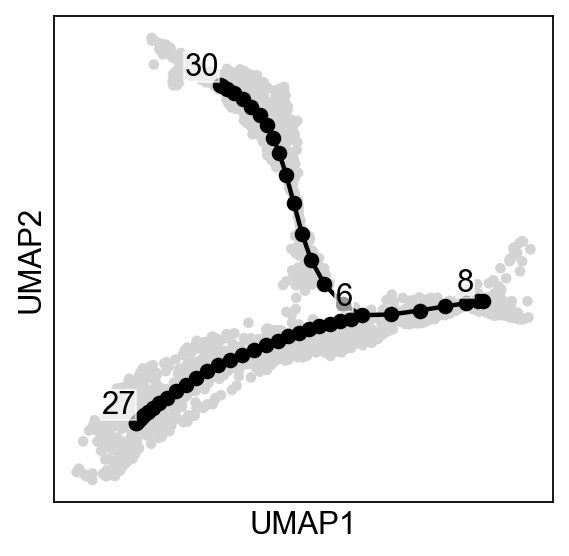

--> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


In [9]:
scf.tl.tree(adata,
            Nodes=50,
            use_rep="X_umap",
            method="ppt",
            ppt_nsteps=50,
            ppt_sigma=sig,
            ppt_lambda=100,
            seed=42,plot=True)

### Exploring sigma in diffusion space

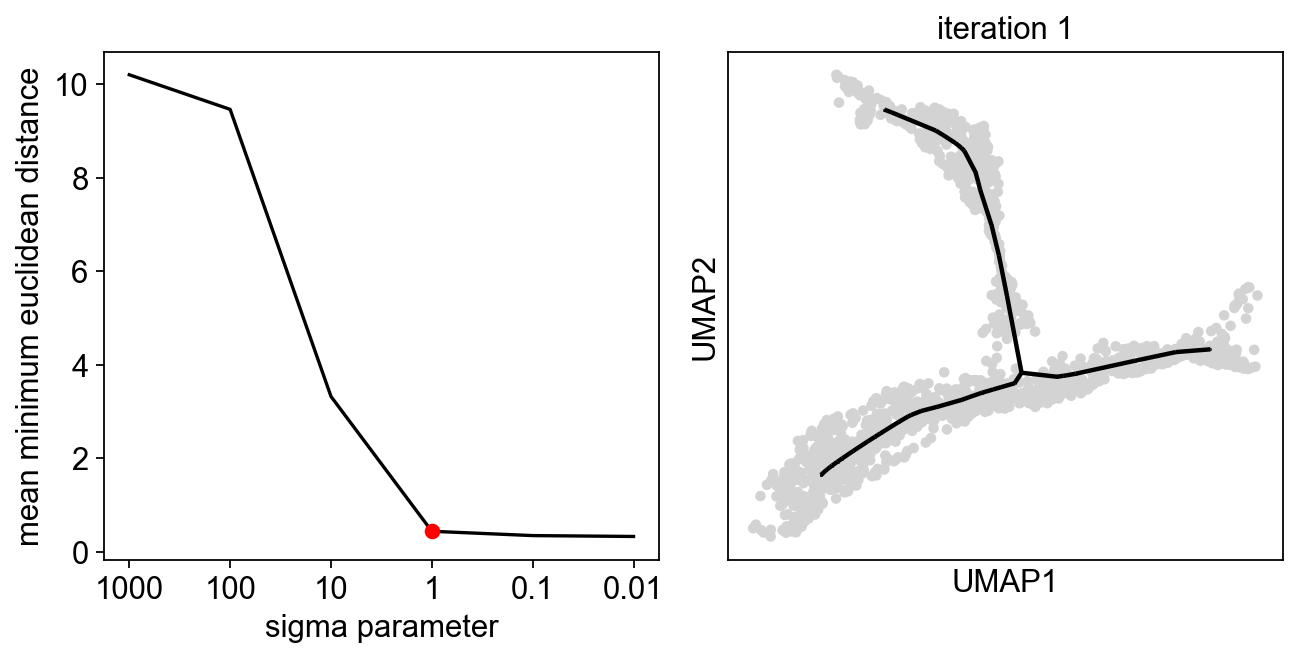

In [10]:
sig=scf.tl.explore_sigma(adata,50,"X_diffusion",seed=42,plot=True)

inferring a principal tree --> parameters used 
    50 principal points, sigma = 1, lambda = 100, metric = euclidean
    fitting:  54%|█████▍    | 27/50 [00:00<00:00, 80.19it/s]
    converged
    finished (0:00:00) 

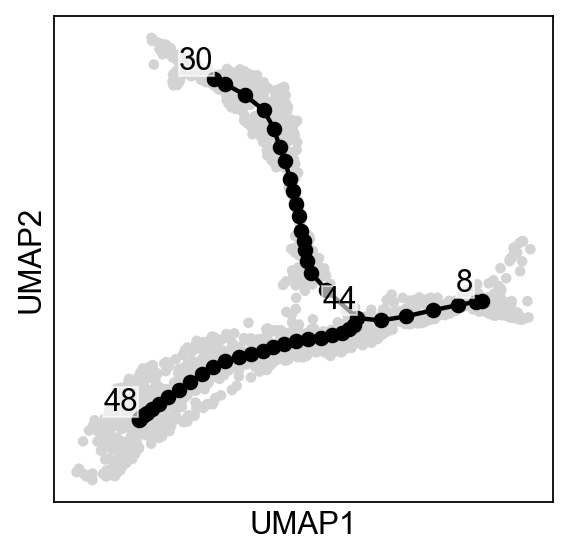

--> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


In [11]:
scf.tl.tree(adata,
            Nodes=50,
            use_rep="X_diffusion",
            method="ppt",
            ppt_nsteps=50,
            ppt_sigma=sig,
            ppt_lambda=100,
            plot=True,
            seed=42)

## Neural crest dataset

Let's reproduce the results from [Soldatov et al. (2019)](https://doi.org/10.1126/science.aas9536)

In [12]:
import scanpy as sc
adata=scf.datasets.neucrest19()

  0%|          | 0.00/9.34M [00:00<?, ?B/s]

We can perform two rounds of exploration, to get a finer selection of the sigma value:

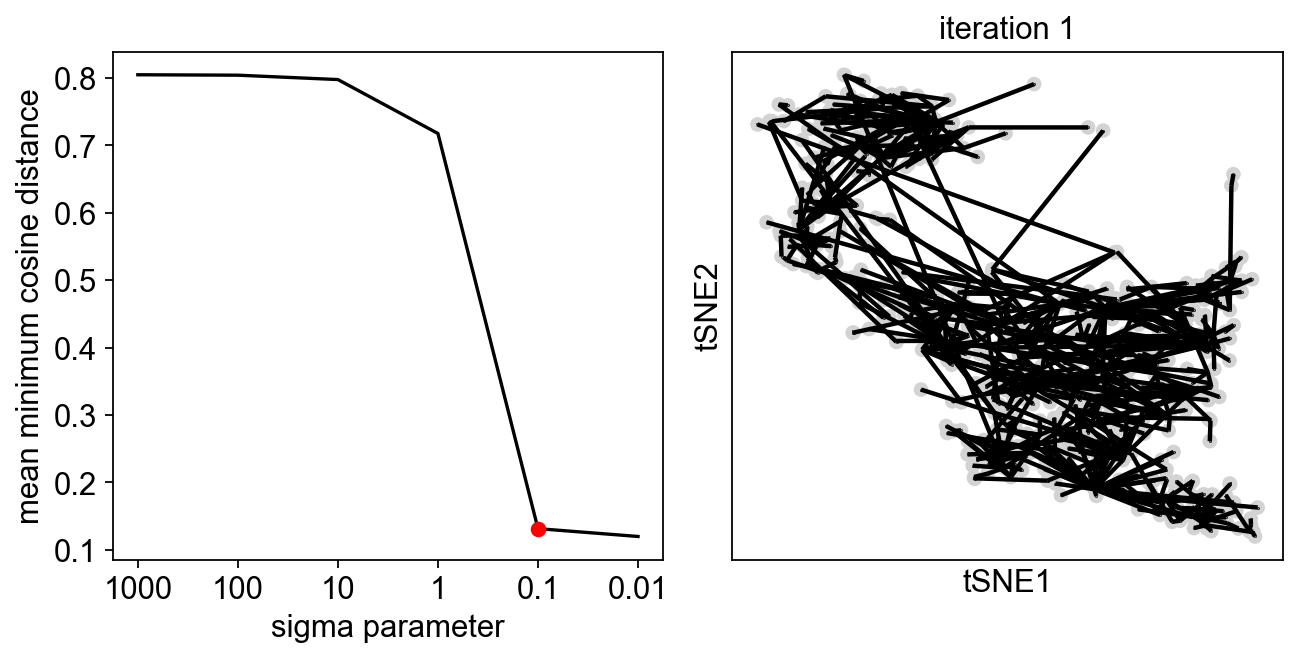

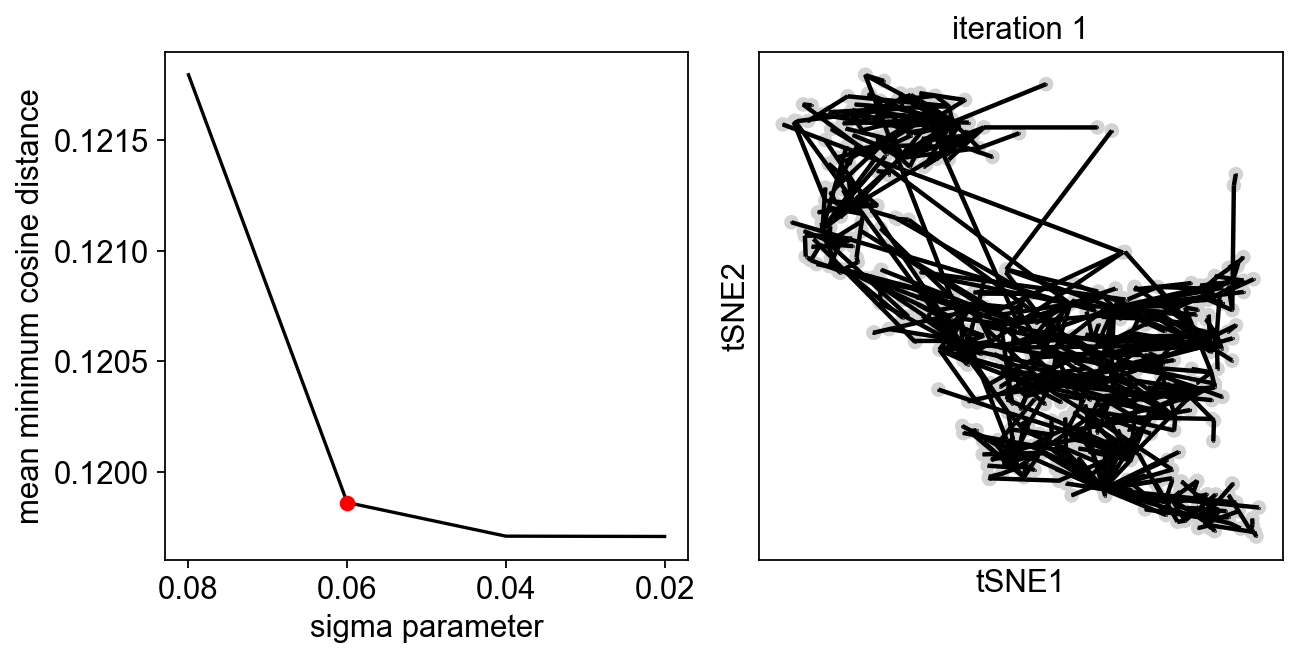

In [13]:
sig=scf.tl.explore_sigma(adata,690,use_rep="X",weight_rep="weights",nsteps=1,metric="cosine",seed=42,plot=True,
                  second_round=True)

Since we are doing only one iteration, the resulting graph can look messy, but our aim is to avoid the collapse of the principal points!

In [14]:
scf.tl.tree(adata,Nodes=adata.shape[0],use_rep="X",weight_rep="weights",
            ppt_metric="cosine",method="ppt",device="gpu",
            ppt_sigma=sig,ppt_lambda=600,seed=42)

inferring a principal tree --> parameters used 
    690 principal points, sigma = 0.06, lambda = 600, metric = cosine
    fitting: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]
    inference not converged (error: 0.00861262787058733)
    finished (0:00:16) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


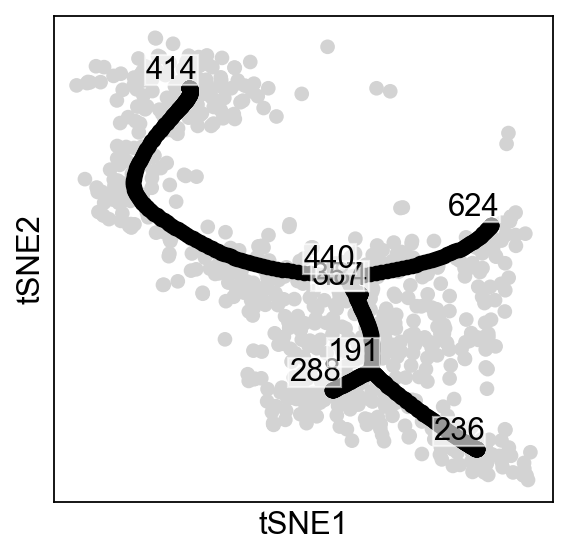

In [15]:
scf.pl.graph(adata)